In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('C://Users//WELCOME//Downloads//ddos//dataset//Syn.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [8]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,445444,172.16.0.5-192.168.50.4-9429-9429-6,172.16.0.5,9429,192.168.50.4,9429,6,2018-11-03 11:36:28.607338,36063894,7,...,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,0,1,Syn
1,113842,172.16.0.5-192.168.50.4-60224-60224-6,172.16.0.5,60224,192.168.50.4,60224,6,2018-11-03 11:36:28.607339,44851366,8,...,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,0,1,Syn
2,176377,172.16.0.5-192.168.50.4-33827-11746-6,192.168.50.4,11746,172.16.0.5,33827,6,2018-11-03 11:36:28.607388,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,Syn
3,24777,172.16.0.5-192.168.50.4-33828-1431-6,172.16.0.5,33828,192.168.50.4,1431,6,2018-11-03 11:36:28.607391,0,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
4,85100,172.16.0.5-192.168.50.4-5311-5311-6,172.16.0.5,5311,192.168.50.4,5311,6,2018-11-03 11:36:28.607442,35731470,8,...,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,0,1,Syn


In [9]:
ack = df[' ACK Flag Count']
pd.unique(ack)


array([1, 0], dtype=int64)

In [11]:
init = df['Init_Win_bytes_forward']
pd.unique(init)
print(max(init))
print(min(init))

65535
-1


In [12]:
seg = df[' min_seg_size_forward']
pd.unique(seg)

array([20, 24,  0, 32, 28, 40, 44], dtype=int64)

In [13]:
iat = df['Fwd IAT Total']
pd.unique(iat)
print(max(iat))
print(min(iat))
print(len(iat))

119992888.0
0.0
4320541


In [10]:
flow = df[' Flow Duration']
pd.unique(flow)
print(max(flow))
print(min(flow))
print(len(flow))

119999653
0
1582681


In [14]:
label = df[' Label']
pd.unique(label)
print(max(label))
print(min(label))
print(len(label))

Syn
BENIGN
4320541


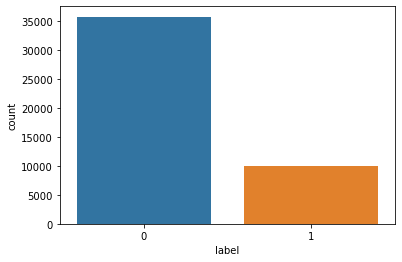

In [46]:
ax = sns.countplot(y,label=" Label")      
B, M = y.value_counts()

In [15]:
data = [df[" ACK Flag Count"], df["Init_Win_bytes_forward"],df[" min_seg_size_forward"], df["Fwd IAT Total"],df[" Flow Duration"], df[" Label"]]

In [16]:
headers = ["ack", "init","seg","iat","flow","label"]

In [17]:
df1 = pd.concat(data, axis=1, keys=headers)

In [18]:
df1

,ack,init,seg,iat,flow,label
0,1,5840,20,36063894.0,36063894,Syn
1,1,5840,20,44851314.0,44851366,Syn
2,0,0,20,1.0,1,Syn
3,1,5840,20,0.0,0,Syn
4,1,5840,20,35731470.0,35731470,Syn
...,...,...,...,...,...,...
4320536,1,29200,32,406975.0,407677,BENIGN
4320537,0,-1,40,3.0,45201,BENIGN
4320538,0,118,32,0.0,182,BENIGN
4320539,0,302,32,1.0,1,BENIGN


In [19]:
df1.to_csv("syn_attributes.csv")


## Model Creation

In [20]:
df1=pd.read_csv('syn_attributes.csv')

In [22]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [23]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [24]:
pd.unique(df1['label'])
# 1 = Syn
# 0 = Benign

array([1, 0])

In [49]:
df1

,Unnamed: 0,ack,init,seg,iat,flow,label
0,0,1,5840,20,115799309.0,115799309,1
1,1,1,5840,20,113973933.0,113973933,1
2,2,1,5840,20,1.0,112,1
3,3,1,5840,20,105985004.0,105985004,1
4,4,1,5840,20,1.0,1,1
...,...,...,...,...,...,...,...
1582676,1582676,1,5840,20,1.0,1,1
1582677,1582677,1,5840,20,1.0,1,1
1582678,1582678,1,5840,20,1.0,1,1
1582679,1582679,1,5840,20,1.0,1,1


In [25]:
# sample 10000 points from majority class to create new dataset
df_maj = df1[df1['label']==1]
df_min = df1[df1['label']==0]
df_maj = df_maj.sample(n=10000)
df_maj = pd.concat([df_maj,df_min], axis=0)


In [27]:
len(df_maj)

45790

In [28]:
X = df_maj.drop('label',axis=1)
y = df_maj['label']

In [29]:
X

,Unnamed: 0,ack,init,seg,iat,flow
289978,289978,1,5840,20,0.0,91
1699222,1699222,1,5840,20,2.0,2
1581478,1581478,1,5840,20,1.0,1
1409355,1409355,1,5840,20,1.0,81
1132050,1132050,1,5840,20,1.0,1
...,...,...,...,...,...,...
4320536,4320536,1,29200,32,406975.0,407677
4320537,4320537,0,-1,40,3.0,45201
4320538,4320538,0,118,32,0.0,182
4320539,4320539,0,302,32,1.0,1


In [30]:
X['init'].value_counts()

-1        11260
 5840      9972
 8192      4593
 29200     2766
 256        912
          ...  
 955          1
 812          1
 844          1
 1068         1
 32544        1
Name: init, Length: 1209, dtype: int64

In [31]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [32]:
y_test.value_counts()

0    7084
1    2074
Name: label, dtype: int64

In [33]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [34]:
y_train.value_counts()

1    28706
0    28706
Name: label, dtype: int64

In [35]:
x_train

,Unnamed: 0,ack,init,seg,iat,flow
0,1371086,1,5840,20,1.000000e+00,100
1,484003,0,527,32,2.000000e+00,2
2,1308903,1,5840,20,0.000000e+00,76
3,1023434,1,5840,20,1.000000e+00,1
4,486160,0,340,32,5.309114e+07,53091141
...,...,...,...,...,...,...
57407,2504786,1,5840,20,1.664331e+00,50
57408,2216846,1,5840,20,1.000000e+00,26
57409,4256618,1,5840,20,1.013478e+01,51
57410,3426814,1,5840,20,3.828834e+01,38


In [36]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

In [37]:
# train_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
# test_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
train_dataset

,Unnamed: 0,ack,init,seg,iat,flow,label
0,1371086,1,5840,20,1.000000e+00,100,1
1,484003,0,527,32,2.000000e+00,2,0
2,1308903,1,5840,20,0.000000e+00,76,1
3,1023434,1,5840,20,1.000000e+00,1,1
4,486160,0,340,32,5.309114e+07,53091141,0
...,...,...,...,...,...,...,...
57407,2504786,1,5840,20,1.664331e+00,50,1
57408,2216846,1,5840,20,1.000000e+00,26,1
57409,4256618,1,5840,20,1.013478e+01,51,1
57410,3426814,1,5840,20,3.828834e+01,38,1


In [39]:
test_dataset

,Unnamed: 0,ack,init,seg,iat,flow,label
491600,491600,1,8192,20,116105819.0,116105819,0
3706398,3706398,1,8192,32,1.0,7282323,0
507819,507819,0,255,20,1.0,1,0
503517,503517,0,-1,32,3.0,24597,0
476839,476839,1,8192,20,530640.0,530640,0
...,...,...,...,...,...,...,...
2521691,2521691,1,5840,20,1.0,1,1
502895,502895,0,256,20,71.0,71,0
179124,179124,1,5840,20,1.0,113,1
492269,492269,0,-1,32,52687478.0,52734126,0


In [40]:
len(train_dataset['init'].value_counts())

1160

In [41]:
# pycaret init
exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(57412, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,1.0000,0.9983,1.0000,0.9991,0.9983,0.9983
1,0.9984,0.9998,0.9972,0.9997,0.9984,0.9969,0.9969
2,0.9990,0.9999,0.9983,0.9997,0.9990,0.9979,0.9979
3,0.9997,1.0000,0.9993,1.0000,0.9997,0.9993,0.9993
4,0.9995,1.0000,0.9993,0.9997,0.9995,0.9990,0.9990
5,0.9990,1.0000,0.9983,0.9997,0.9990,0.9979,0.9979
6,0.9993,1.0000,0.9990,0.9997,0.9993,0.9986,0.9986
7,0.9990,1.0000,0.9979,1.0000,0.9990,0.9979,0.9979
8,0.9991,1.0000,0.9983,1.0000,0.9991,0.9983,0.9983
9,0.9995,1.0000,0.9997,0.9993,0.9995,0.9990,0.9990


In [43]:
tuned_xgb = tune_model(xgb_model, optimize = 'AUC')

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:32:34
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [40]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9981,1.0000,1.0000,0.9963,0.9981,0.9963,0.9963
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,0.9992,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,0.9993,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [41]:
tuned_ada = tune_model(ada_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,0.9998,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,0.9999,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [42]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,1.0000,1.0000,0.9975,0.9988,0.9975,0.9975
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,0.9994,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,0.9994,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [43]:
tuned_rf = tune_model(rf_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,1.0000,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [44]:
lgbm_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9981,1.0000,1.0000,0.9963,0.9981,0.9963,0.9963
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,0.9988,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [45]:
tuned_lgbm = tune_model(lgbm_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,1.0000,1.0000,0.9988,0.9994,0.9988,0.9988
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9988,0.9996,0.9975,1.0000,0.9988,0.9975,0.9975
4,0.9994,1.0000,0.9988,1.0000,0.9994,0.9988,0.9988
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,0.9999,0.9988,1.0000,0.9994,0.9988,0.9988
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9994,1.0000,1.0000,0.9988,0.9994,0.9988,0.9988


In [46]:
lr_model=create_model('lr') #JUST TO CHECK IF ITS SHOWING GOOD RESULTS FOR ALL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7049,0.7713,0.9102,0.6454,0.7553,0.4097,0.4493
1,0.6999,0.7564,0.9214,0.6387,0.7545,0.3997,0.4459
2,0.7031,0.7585,0.9339,0.6391,0.7589,0.4059,0.4577
3,0.6887,0.7677,0.9140,0.6303,0.7461,0.3772,0.4226
4,0.8334,0.8879,0.7282,0.9226,0.8139,0.6669,0.6823
5,0.6725,0.7640,0.9176,0.6156,0.7368,0.3452,0.3960
6,0.6744,0.7516,0.9226,0.6163,0.7390,0.3489,0.4019
7,0.8135,0.8729,0.6941,0.9115,0.7881,0.6269,0.6455
8,0.6837,0.7619,0.9026,0.6276,0.7404,0.3676,0.4089
9,0.8203,0.8794,0.7154,0.9052,0.7992,0.6406,0.6552


## Manual training

In [47]:
x_test.drop(['Unnamed: 0'],axis=1,inplace=True)
x_train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [48]:
x_test

,ack,init,seg,iat,flow
904807,1,5840,20,80232156.0,80232156
1093463,1,5840,20,1.0,1
1126558,1,5840,20,1.0,1
1536489,1,5840,20,1.0,1
842556,1,5840,20,1.0,1
...,...,...,...,...,...
1462950,1,5840,20,1.0,1
96285,1,5840,20,1.0,1
928965,1,5840,20,1.0,1
484783,1,5840,20,1.0,53


In [44]:
x_train

,Unnamed: 0,ack,init,seg,iat,flow
0,529784,1,5840,20,1.000000e+00,1
1,909726,1,8192,20,5.908991e+07,59089908
2,1139835,1,5840,20,1.000000e+00,1
3,1341910,1,5840,20,1.000000e+00,1
4,646999,1,5840,20,1.000000e+00,1
...,...,...,...,...,...,...
16025,1481320,0,2960,20,0.000000e+00,131
16026,337934,0,-1,20,1.558596e+00,20826
16027,965751,0,100,20,1.587907e+00,12262
16028,851445,1,8192,20,1.072399e+07,15713638


### Training Different Models

In [66]:
xgb = XGBClassifier(scale_pos_weight=1)
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)



[19:56:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
x_train

,ack,init,seg,iat,flow
0,1,5840,20,1.000000e+00,110
1,1,8192,20,5.908991e+07,59089908
2,1,5840,20,1.000000e+00,1
3,1,5840,20,1.000000e+00,1
4,1,5840,20,1.019999e+08,101999853
...,...,...,...,...,...
16025,0,-1,20,1.000000e+00,20992
16026,0,16352,20,0.000000e+00,54839
16027,1,8192,20,1.089716e+07,15885725
16028,0,7324,20,5.992063e+07,59925068


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      2079
   macro avg       0.98      1.00      0.99      2079
weighted avg       1.00      1.00      1.00      2079



In [69]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  99.85569985569985
xgb roc_auc Score ->  0.9992443324937028
f1 score -> 0.9992437610284849


In [70]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      2079
   macro avg       0.98      1.00      0.99      2079
weighted avg       1.00      1.00      1.00      2079



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
conf_mat_xgb = confusion_matrix(y_test,predictions_xgb)
print(conf_mat_xgb)

[[  94    0]
 [   3 1982]]


# ADA BOOST

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [86]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      2079
   macro avg       0.99      0.99      0.99      2079
weighted avg       1.00      1.00      1.00      2079



In [87]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  99.85569985569985
ada roc_auc Score ->  0.9941770727262983
ada f1 score -> 0.9992441421012849


# RF

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [93]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      2079
   macro avg       0.99      0.99      0.99      2079
weighted avg       1.00      1.00      1.00      2079



In [94]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  99.85569985569985
rf roc_auc Score ->  0.9941770727262983
rf f1 score -> 0.9992441421012849


# LGBM

In [95]:
import lightgbm

In [96]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [97]:
print(classification_report(y_test,predictions_lgbm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        94
           1       1.00      1.00      1.00      1985

    accuracy                           1.00      2079
   macro avg       0.99      1.00      0.99      2079
weighted avg       1.00      1.00      1.00      2079



In [98]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  99.90379990379991
rf roc_auc Score ->  0.9994962216624685
rf f1 score -> 0.9994959677419354


# Running on Whole Dataset


In [74]:
whole_df = df1
whole_df

,ack,init,seg,iat,flow,label
0,1,5840,20,115799309.0,115799309,1
1,1,5840,20,113973933.0,113973933,1
2,1,5840,20,1.0,112,1
3,1,5840,20,105985004.0,105985004,1
4,1,5840,20,1.0,1,1
...,...,...,...,...,...,...
1582676,1,5840,20,1.0,1,1
1582677,1,5840,20,1.0,1,1
1582678,1,5840,20,1.0,1,1
1582679,1,5840,20,1.0,1,1


In [75]:
whole_y = whole_df['label']
whole_x = whole_df.drop(['label'],axis=1)

In [76]:
whole_x

,ack,init,seg,iat,flow
0,1,5840,20,115799309.0,115799309
1,1,5840,20,113973933.0,113973933
2,1,5840,20,1.0,112
3,1,5840,20,105985004.0,105985004
4,1,5840,20,1.0,1
...,...,...,...,...,...
1582676,1,5840,20,1.0,1
1582677,1,5840,20,1.0,1
1582678,1,5840,20,1.0,1
1582679,1,5840,20,1.0,1


In [77]:
whole_x

,ack,init,seg,iat,flow
0,1,5840,20,115799309.0,115799309
1,1,5840,20,113973933.0,113973933
2,1,5840,20,1.0,112
3,1,5840,20,105985004.0,105985004
4,1,5840,20,1.0,1
...,...,...,...,...,...
1582676,1,5840,20,1.0,1
1582677,1,5840,20,1.0,1
1582678,1,5840,20,1.0,1
1582679,1,5840,20,1.0,1


In [78]:
whole_predict_xgb = xgb_clf.predict(whole_x)

In [89]:
print(classification_report(whole_y,whole_predict_xgb))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_xgb)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.31      1.00      0.48       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.66      1.00      0.74   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    392       0]
 [    863 1581426]]


In [91]:
whole_predict_ada = ada_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_ada))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_ada)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.73      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    391       1]
 [    466 1581823]]


In [99]:
whole_predict_rf = rf_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_rf))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_rf)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.72      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    391       1]
 [    479 1581810]]


In [100]:
whole_predict_lgbm = lgbm_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_lgbm))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_lgbm)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       392
           1       1.00      1.00      1.00   1582289

    accuracy                           1.00   1582681
   macro avg       0.73      1.00      0.81   1582681
weighted avg       1.00      1.00      1.00   1582681

[[    392       0]
 [    467 1581822]]
